# Interpretación gráfica de la derivada
Como vimos en las clases anteriores, la razon de cambio nos permite determinar la pendiente de la recta tangente de una función $f(x)$ en un punto $x_0$.




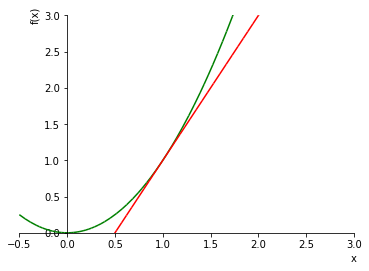

In [2]:
from sympy import *
x=symbols('x')
f=(x**2)
df =diff(f)
m=df.subs(x,1)
rt=m*(x-1)+1
G=plot(f,(x,-0.5,3),axis_center=(0,0),ylim=(0,3),line_color='g',show=false)
G.extend(plot(rt,(x,-0.5,3),line_color='r',show=false))
G.show()

## Visualización de la razón de cambio instantánea

A continuación vemos una pequeña animación de Geogebra que justifica el uso de la derivada, clickea sobre la imagen:


[![imagengeogebra](https://github.com/MCG-Externado/MCG1/blob/master/imagenes/Derivada.png?raw=true)](https://www.geogebra.org/classic/rz7ajarm)

# Derivada
como vimos anteriormente, la derivada de una función $f$ se define como la razón de cambio en el intervalo $[x,x+h]$ cuando $h$ tiende a cero, es decir
$$f'(h)=\lim_{x\to0}\frac{f(x+h)-f(x)}{h}$$

## Reglas de derivación
Con los ejemplos que se han desarrollado hasta el momento, es claro que el cálculo de las derivadas mediante la definición puede llegar a ser un poco egorroso y desgastante, para ahorrar un poco de esfuerzos las reglas de derivación son muy eficientes.

| **$f(x)$**| **$f'(x)$** |
|:---:|:---:|
|$k$ | $0$|
|$(u)^n$| $n(u)^{n-1}(u')$| 
|$e^u$| $e^u(u')$|
|$ln(u)$ |$\frac{1}{u}(u')$|
|$f(x)\pm g(x)$|$f'(x)\pm g'(x)$|

### Ejemplos:
1. Halle la derivada de la función $f(x)=(2x-1)^3$.

Claramente se pide hallar la derivada de algo del estilo $(u)^n$ junto con la regla de de la suma/resta, de modo que su derivada será

$$f'(x)=3(2x+1)^{3-1}(2)=3(2x+1)^{2}(2).$$

2. Halle la derivada de $y=e^{7x^2-10x}$.

En este ejemplo deben emplearse la tercera regla de derivación que se puede observar en la tabla como también la regla de la suma/resta, por lo tanto
$$y'=e^{7x^2-10x}\left( 2\left(7x^{2-1}\right)-10\right)=e^{7x^2-10x}\left( 14x-10\right).$$

3. Calcule la derivada de $g(t)=ln(5t^4-3)$.

Para desarrollar el ejercicio se deben utilizar la cuarta regla de la tabla y la de la suma/resta, por lo que
$$g'(t)=\frac{1}{5t^4-3}\left(5\left(4t^{4-1}\right)\right)=\frac{20t^3}{5t^4-3}.$$


## Derivadas en Python usando sympy

Usando el paquete `sympy` usamos la función `diff()` para calcular la derivada de una función. 

***Sintáxis de la función diff:***

```
diff(función,variable)
```

En las siguientes líneas calculamos la derivada de las funciones de los ejemplos anteriores:

In [4]:
x=symbols('x') #Recuerda definir el simbolo x para que la máquina reconozca que x es una variable.

L1=(2*x-1)**3
L1 #Veamos la función

(2*x - 1)**3

In [5]:
diff(L1) #diff calcula la derivada

6*(2*x - 1)**2

In [6]:
expand(diff(L1)) #expand permite expandir la función

24*x**2 - 24*x + 6

In [7]:
L2= E**(7*x**2-10*x)
L2

exp(7*x**2 - 10*x)

In [8]:
diff(L2)

(14*x - 10)*exp(7*x**2 - 10*x)

In [9]:
expand(diff(L2))

14*x*exp(-10*x)*exp(7*x**2) - 10*exp(-10*x)*exp(7*x**2)


## Regla del producto
$$\left(f(x)g(x)\right)'=f'(x)g(x)+g'(x)f(x)$$
Esta regla es muy importante ya que no siempre se tiene funciones que contengan un único factor,
por ejemplo $$h(x)=(4x-5)^3e^x$$
su derivada será
$$h'(x)=3(4x-5)^2(4)e^x+e^x(1)(4x-5)^3$$

En lo que sigue encontrará un algoritmo muy sencillo que calcula la derivada del producto y muestra el razonamiento a realizar.



In [3]:
def derivaciondeproducto(f):
    print("Identifique dos posibles factores de") 
    pprint(f,use_unicode=False) 
    
    f1=input("Ingrese el primer factor: ")
    f1=sympify(f1)
    f2=input("Ingrese el segundo factor: ")
    f2=sympify(f2)
    if simplify(f1*f2)==simplify(f):
        print("Muy bien. El calculo de la derivada se hace de la siguiente manera:")
        pprint(diff(f1)*f2+diff(f2)*f1,use_unicode=False)
        
        print("Obtenemos:")
        pprint(simplify(diff(f1)*f2+diff(f2)*f1),use_unicode=False)
        return simplify(diff(f))
    else:
        print("Revisa tus entradas, algo salio mal.")
        derivaciondeproducto(f)

In [4]:
f=(E**x)*((4*x-5)**3)
derivaciondeproducto(f)

Identifique dos posibles factores de
         3  x
(4*x - 5) *e 
Ingrese el primer factor: 4*x
Ingrese el segundo factor: 2*x
Revisa tus entradas, algo salio mal.
Identifique dos posibles factores de
         3  x
(4*x - 5) *e 
Ingrese el primer factor: (E**x)
Ingrese el segundo factor: ((4*x-5)**3)
Muy bien. El calculo de la derivada se hace de la siguiente manera:
         3  x               2  x
(4*x - 5) *e  + 12*(4*x - 5) *e 
Obtenemos:
         2            x
(4*x - 5) *(4*x + 7)*e 


## Regla del cociente
$$\left(\frac{f(x)}{g(x)}\right)'=\frac{f'(x)g(x)-g'(x)f(x)}{\left[g(x)\right]^2}$$
Ya que no siempre se tienen productos entre las funciones, es necesario entender como derivar una división, por ejemplo
$$h(x)=\frac{3x+1}{e^{2x+6}}$$
su derivada será
$$h'(x)=\frac{(3+0)e^{2x+6}-e^{2x+6}(2)(3x+1)}{\left[e^{2x+6}\right]^2}=\frac{3e^{2x+6}-e^{2x+6}(6x+2)}{\left[e^{2x+6}\right]^2}=\frac{-6x+1}{e^{2x+6}}$$

Igual que en el ejemplo anterior haremos un algoritmo simple que permita recosntruir el procedimiento que calcula la derivada de un cociente:

In [13]:
def derivaciondecociente(f):
    print("Identifique dos posibles factores de") 
    pprint(f,use_unicode=False) 
    
    f1=input("Ingrese el numerador: ")
    f1=sympify(f1)
    f2=input("Ingrese el denominador: ")
    f2=sympify(f2)
    if simplify(f1/f2)==simplify(f):
        print("Muy bien. El calculo de la derivada se hace de la siguiente manera:")
        pprint((diff(f1)*f2-diff(f2)*f1)/(f2**2),use_unicode=False)
        
        print("Obtenemos:")
        pprint(simplify((diff(f1)*f2-diff(f2)*f1)/(f2**2)),use_unicode=False)
        return simplify(diff(f))
    else:
        print("Revisa tus entradas, algo salio mal.")
        derivaciondecociente(f)

In [14]:
h=(3*x+1)/(E**(2*x+6))
derivaciondecociente(h)

Identifique dos posibles factores de
           -2*x - 6
(3*x + 1)*e        
Ingrese el numerador: (3*x+1)
Ingrese el denominador: (E**(2*x+6))
Muy bien. El calculo de la derivada se hace de la siguiente manera:
/               2*x + 6      2*x + 6\  -4*x - 12
\- 2*(3*x + 1)*e        + 3*e       /*e         
Obtenemos:
           -2*x - 6
(1 - 6*x)*e        


(1 - 6*x)*exp(-2*x - 6)

## Ejercicio

Ejecute las siguientes celdas y describa que se está haciendo cada una. Explique que hace la función `prod()` y `divi()`.


In [ ]:
f=E**x

In [ ]:
g=(4*x-5)**3

In [ ]:
diff(g*f)

In [ ]:
h=3*x+1

In [ ]:
j=E**(2*x+6)

In [ ]:
diff(h/j)

In [ ]:
def prod(f,g):
    return diff(f)*g+diff(g)*f

In [ ]:
prod(f,g)

In [ ]:
def divi(f,g):
    return (diff(f)*g-diff(g)*f)/(g**2)

In [ ]:
divi(h,j)

## Ejercicio

Calcule las derivadas de las siguientes funciones usando `derivaciondeproducto()` y `derivaciondecociente()`, NO SE ANGUSTIE si tiene dificultades al ingresar las funciones. Preguntele a su profesor.

    
1. $x^3e^x$

2. $(x^2+2x+1)(x+\frac{1}{x})$

3. $\cfrac{x^2+3x-1}{\sqrt{x}+3}$

4. $\cfrac{1}{x^2+e^{12x-10}}$

5. $\sqrt[3]{x}\ln x$ 
